# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification with Multi-layer Perceptrons

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

In [2]:
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
from math import sqrt
import nnFunctions
import importlib
%matplotlib inline

In [3]:
# run this cell if you modified the nnFunctions.py file and you wish to reload the module
importlib.reload(nnFunctions)

<module 'nnFunctions' from 'C:\\Users\\Sachin\\Desktop\\UB Slides\\sem2\\ML\\PA2\\nnFunctions.py'>

In [4]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [5]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

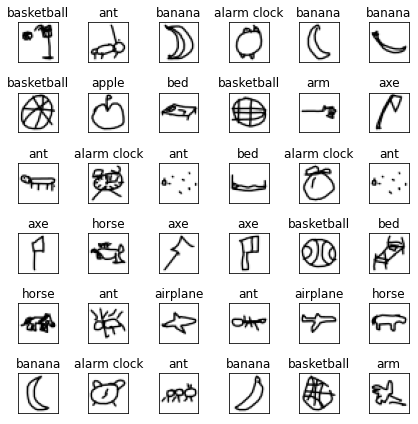

In [6]:
# visualize some images
fig = plt.figure(figsize=[6,6])
for i in range(36):
    ax = plt.subplot(6,6,i+1)    
    ind = np.random.randint(0,train_data.shape[0])
    plt.imshow(train_data[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(train_label[ind])])
plt.tight_layout()

In [7]:
M = [10,20,30,40,50,60,70,80,90,100]
trainTimeData = []
trainAccData = []
testAccData = []
for m in M:
    #  Train Neural Network
    # set the number of nodes in input unit (not including bias unit)
    n_input = train_data.shape[1]

    # set the number of nodes in hidden unit or M (not including bias unit)
    n_hidden = m # you can modify this parameter

    # set the number of nodes in output unit
    n_class = len(np.unique(train_label)) # this parameter is fixed

    # initialize the weights into some random matrices
    initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
    initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

    # unroll 2 weight matrices into single column vector
    initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

    # set the regularization hyper-parameter
    lambdaval = 0 # you can modify this parameter

    args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

    # Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
    # Check documentation for a working example
    opts = {'maxiter': 50}  # Preferred value.
    st = time.time()
    nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
    en = time.time()
    # Reshape nnParams from 1D vector into W1 and W2 matrices
    W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
    trainTime = en-st
    print("Training completed in {:.2f} seconds.".format(trainTime))
    trainTimeData.append(trainTime)

    # Test the computed parameters

    # find the accuracy on Training Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
    trainAccuracy = (100 * np.mean((predicted_label == train_label.astype(float))))
    print('Training set Accuracy: {:.2f}%'.format(trainAccuracy))
    trainAccData.append(trainAccuracy)

    # find the accuracy on Testing Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
    testAccuracy = (100 * np.mean((predicted_label == test_label.astype(float))))
    print('Test set Accuracy    : {:.2f}%'.format(testAccuracy))
    testAccData.append(testAccuracy)
    

    

C:\Users\Sachin\Desktop\UB Slides\sem2\ML\PA2\nnFunctions.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Training completed in 14.17 seconds.
Training set Accuracy: 37.42%
Test set Accuracy    : 36.95%
Training completed in 16.10 seconds.
Training set Accuracy: 57.64%
Test set Accuracy    : 56.10%
Training completed in 15.29 seconds.
Training set Accuracy: 61.60%
Test set Accuracy    : 59.20%
Training completed in 15.45 seconds.
Training set Accuracy: 65.70%
Test set Accuracy    : 63.11%
Training completed in 17.84 seconds.
Training set Accuracy: 66.04%
Test set Accuracy    : 63.33%
Training completed in 19.42 seconds.
Training set Accuracy: 67.92%
Test set Accuracy    : 64.92%
Training completed in 21.06 seconds.
Training set Accuracy: 69.07%
Test set Accuracy    : 65.62%
Training completed in 21.82 seconds.
Training set Accuracy: 69.00%
Test set Accuracy    : 65.18%
Training completed in 24.20 seconds.
Training set Accuracy: 69.60%
Test set Accuracy    : 65.66%
Training completed in 23.74 seconds.
Training set Accuracy: 70.53%
Test set Accuracy    : 66.18%


ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

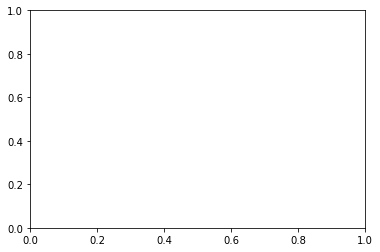

In [12]:
#plt.plot(M, trainTimeData, label = "Training Time")
plt.plot(M, trainAccData, label = "Training Accuracy")
plt.plot(M, testAccData, label = "Test Accuracy")
plt.xlabel('M')
plt.legend()
plt.show()

In [9]:
trainTimeData = []
trainAccData = []
testAccData = []
lamb=np.arange(0,21,2)
#  Train Neural Network
# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit or M (not including bias unit)
n_hidden = 60 # you can modify this parameter

# set the number of nodes in output unit
n_class = len(np.unique(train_label)) # this parameter is fixed

# initialize the weights into some random matrices
initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

for l in lamb:
    # set the regularization hyper-parameter
    lambdaval = l # you can modify this parameter

    args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

    # Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
    # Check documentation for a working example
    opts = {'maxiter': 50}  # Preferred value.
    st = time.time()
    nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
    en = time.time()
    # Reshape nnParams from 1D vector into W1 and W2 matrices
    W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
    trainTime = en-st
    print("Training completed in {:.2f} seconds.".format(trainTime))
    trainTimeData.append(trainTime)

    # Test the computed parameters

    # find the accuracy on Training Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
    trainAccuracy = (100 * np.mean((predicted_label == train_label.astype(float))))
    print('Training set Accuracy: {:.2f}%'.format(trainAccuracy))
    trainAccData.append(trainAccuracy)

    # find the accuracy on Testing Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
    testAccuracy = (100 * np.mean((predicted_label == test_label.astype(float))))
    print('Test set Accuracy    : {:.2f}%'.format(testAccuracy))
    testAccData.append(testAccuracy)
    



Training completed in 16.64 seconds.
Training set Accuracy: 67.90%
Test set Accuracy    : 64.08%
Training completed in 18.94 seconds.
Training set Accuracy: 68.05%
Test set Accuracy    : 64.37%
Training completed in 17.61 seconds.
Training set Accuracy: 68.26%
Test set Accuracy    : 64.48%
Training completed in 19.56 seconds.
Training set Accuracy: 68.81%
Test set Accuracy    : 65.06%
Training completed in 24.93 seconds.
Training set Accuracy: 68.26%
Test set Accuracy    : 64.73%
Training completed in 19.44 seconds.
Training set Accuracy: 67.83%
Test set Accuracy    : 64.13%
Training completed in 23.77 seconds.
Training set Accuracy: 68.16%
Test set Accuracy    : 64.45%
Training completed in 18.73 seconds.
Training set Accuracy: 68.73%
Test set Accuracy    : 64.93%
Training completed in 18.73 seconds.
Training set Accuracy: 68.40%
Test set Accuracy    : 65.05%
Training completed in 20.13 seconds.
Training set Accuracy: 67.80%
Test set Accuracy    : 64.28%
Training completed in 17.28 se

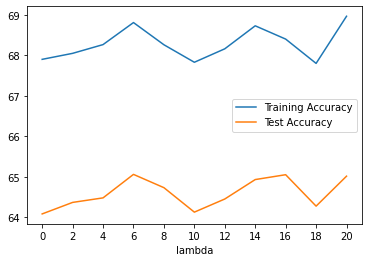

In [11]:

#plt.plot(xTicks, trainTimeData, label = "Training Time")
plt.plot(lamb, trainAccData, label = "Training Accuracy")
plt.plot(lamb, testAccData, label = "Test Accuracy")
plt.xlabel('lambda')
plt.xticks(lamb)
plt.legend()
plt.show()

In [ ]:
#  Train Neural Network
# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit or M (not including bias unit)
n_hidden = 60 # you can modify this parameter

# set the number of nodes in output unit
n_class = len(np.unique(train_label)) # this parameter is fixed

# initialize the weights into some random matrices
initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

# set the regularization hyper-parameter
lambdaval = 10 # you can modify this parameter

args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
# Check documentation for a working example
opts = {'maxiter': 50}  # Preferred value.
st = time.time()
nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
en = time.time()
# Reshape nnParams from 1D vector into W1 and W2 matrices
W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
print("Training completed in {:.2f} seconds.".format(en-st))

# Test the computed parameters

# find the accuracy on Training Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
print('Training set Accuracy: {:.2f}%'.format(100 * np.mean((predicted_label == train_label.astype(float)))))

# find the accuracy on Testing Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
print('Test set Accuracy    : {:.2f}%'.format(100 * np.mean((predicted_label == test_label.astype(float)))))

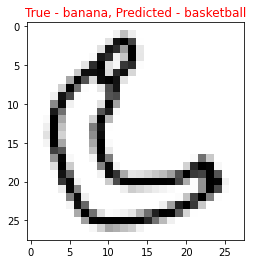

In [21]:
# visualize prediction on a random image
rnd_ind = np.random.randint(test_label.shape[0])
predicted_label = nnFunctions.nnPredict(W1,W2,test_data[rnd_ind:rnd_ind+1,:])
if predicted_label[0] == test_label[rnd_ind]:
    params = {"text.color" : "green"}
else:
    params = {"text.color" : "red"}
plt.rcParams.update(params)

plt.imshow(test_data[rnd_ind,:].reshape((28,28)),cmap='Greys')
t = plt.title('True - {}, Predicted - {}'.format(classes[int(test_label[rnd_ind])],classes[int(predicted_label[0])]))